# 1. General approach
<div class="alert alert-block alert-info">
My approach involves using multiple datasets from reliable sources to create a unified and insightful story. The goal is to create a graphic-heavy, one-page handout in A3 size.

The datasets I selected are well-maintained, so I focused on adding creativity to the design. While there are pre-existing visualizations available for these datasets, I wanted to rework them to better fit the design of my narrative and showcase my individual style. I also ensured that there was a variety of chart types, including line, bar, treemap, word cloud, and bubble charts.

I chose Plotly for visualizations 1 through 4, and Matplotlib for visualizations 5 and 6. The reason for this is that Plotly doesn't offer a simple way to create a radial bar chart (needed for viz 5), and I used the WordCloud package for viz 6, which depends on Matplotlib.

For further editing and finalizing the handout, I used Canva, my favorite design tool of all time. Canva allows me to upload and edit SVG images, and even with a free account, I have all the resources necessary to produce stunning visuals. Some of the graphics I used came directly from Canva’s collection, while others were found vai Google search, which I also included in the zip file.

I chose the color palette thoughtfully, and I believe it fits the theme very well. I also made sure to check for color blindness accessibility.

Color palette:

* Neon green: #1adc1b
* Blackish grey: #303030
* Light grey: #c7c5cd
* Dark blue: #000066
* Greyish blue: #0d6986
* Tuscan: #fad6a5
* Black: #000000
* White: #ffffff

Fonts:

* Open Sans (default font in Plotly)
* MOKOTO GLITCH 2 (to give an IT vibe)
* JetBrains Mono (for some titles)

</div>

# 2. Creation of visualizations
<div class="alert alert-block alert-info">
In this section, I’ll briefly introduce the dataset, outline the full preprocessing steps, and present the drafts of the visualizations I created.

I left the hover functionality active so I could verify the results. Since the exported charts are static anyway, this decision didn’t affect the output.

Below is a list of the packages required for this process.
</div>

In [1]:
# %pip install wordcloud
# source: https://github.com/amueller/word_cloud

# %pip install kaleido 
# kaleido is plotly's image rendering engine, which prevents Plotly's adjustments during download, makes sure the image export is exactly as the layout defined in the code 

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap
from collections import defaultdict

## 2.1. Viz 1 

### 2.1.1. About the data set
<div class="alert alert-block alert-info">
Data source: 


https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
</div>

In [3]:
df1 = pd.read_csv('viz1/WDICSV.csv')
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397936 entries, 0 to 397935
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    397936 non-null  object 
 1   Country Code    397936 non-null  object 
 2   Indicator Name  397936 non-null  object 
 3   Indicator Code  397936 non-null  object 
 4   1960            37640 non-null   float64
 5   1961            42584 non-null   float64
 6   1962            43872 non-null   float64
 7   1963            44797 non-null   float64
 8   1964            45321 non-null   float64
 9   1965            47467 non-null   float64
 10  1966            47465 non-null   float64
 11  1967            48146 non-null   float64
 12  1968            48763 non-null   float64
 13  1969            49538 non-null   float64
 14  1970            73261 non-null   float64
 15  1971            79529 non-null   float64
 16  1972            80296 non-null   float64
 17  1973      

### 2.1.2. Preprocessing
<div class="alert alert-block alert-info">
The dataset is quite large, but I only need the figures for 'Population, total' and 'Individuals using the Internet (% of population)' from 1990 to 2024 on a global scale.
</div>

In [5]:
viz1 = (
    df1[
        (df1['Country Name'] == 'World') &
        (df1['Indicator Name'].isin([
            'Population, total',
            'Individuals using the Internet (% of population)'
        ]))
    ]
    .rename(columns={'Indicator Name': 'Year'})
)

viz1 = viz1[['Year'] + [str(year) for year in range(1990, 2024)]]
viz1.head()

,Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
72428,Individuals using the Internet (% of population),4.882469e-02,7.881052e-02,1.251863e-01,1.790067e-01,3.605081e-01,6.830821e-01,1.326567e+00,2.042697e+00,3.140580e+00,...,3.750000e+01,3.990000e+01,4.290000e+01,4.540000e+01,4.860000e+01,5.320000e+01,5.930000e+01,6.220000e+01,6.440000e+01,6.740000e+01
72895,"Population, total",5.293498e+09,5.382641e+09,5.470272e+09,5.556732e+09,5.642157e+09,5.726849e+09,5.811695e+09,5.896175e+09,5.979851e+09,...,7.317305e+09,7.404251e+09,7.490956e+09,7.577110e+09,7.661178e+09,7.742725e+09,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09


In [6]:
viz1 = viz1.T.reset_index()
viz1.columns = ['Year', 'Individuals using the Internet (% of population)', 'Population, total']
viz1 = viz1.drop(index=0).reset_index(drop=True)

viz1.head()

,Year,Individuals using the Internet (% of population),"Population, total"
0,1990,0.048825,5293498452.0
1,1991,0.078811,5382640911.0
2,1992,0.125186,5470271607.0
3,1993,0.179007,5556732311.0
4,1994,0.360508,5642156981.0


<div class="alert alert-block alert-info">
Next, I calculated the exact number of people using the Internet.
</div>

In [7]:
viz1['Individuals using the Internet'] = (
    viz1['Individuals using the Internet (% of population)'] *
    viz1['Population, total'] / 100
)

viz1[['Population, total', 'Individuals using the Internet']] = (
    viz1[['Population, total', 'Individuals using the Internet']]
    .astype(float)
    .round(0)
)

viz1.head()

,Year,Individuals using the Internet (% of population),"Population, total",Individuals using the Internet
0,1990,0.048825,5.293498e+09,2584534.0
1,1991,0.078811,5.382641e+09,4242087.0
2,1992,0.125186,5.470272e+09,6848032.0
3,1993,0.179007,5.556732e+09,9946922.0
4,1994,0.360508,5.642157e+09,20340436.0


### 2.1.3. Create viz

In [8]:
fig1 = px.line(
    viz1,
    x="Year",
    y=['Population, total', "Individuals using the Internet"],
    color_discrete_map={
        'Population, total': '#303030',
        'Individuals using the Internet': '#1adc1b'
    }
)

fig1.update_layout(
    paper_bgcolor='#c7c5cd',
    plot_bgcolor='#c7c5cd',
    width=900,
    height=600,
    xaxis=dict(
        showline=True,
        linecolor='black',
        showgrid=False,
        zeroline=False,
        ticks="outside",
        dtick=3,
        tickfont=dict(size=15, color='black'),
        title=None
    ),
    yaxis=dict(
        showline=True,
        linecolor='black',
        showgrid=False,
        range=[0, None],
        ticks="outside",
        tickfont=dict(size=15, color='black'),
        title=None
    ),
    showlegend=False
)

fig1.update_traces(line=dict(width=7))

fig1.show()

# Export the figure to an image (ensures fixed layout)
pio.write_image(fig1, "viz1/viz1_capstone_NMN.svg", width=900, height=600)


## 2.2. Viz 2

### About the data set

<div class="alert alert-block alert-info">
Data source: 

https://www.ic3.gov/AnnualReport/Reports

Specifically, I extracted data from the 2023 and 2022 IC3 Annual Reports (https://www.ic3.gov/AnnualReport/Reports/2023_IC3Report.pdf and https://www.ic3.gov/AnnualReport/Reports/2022_IC3Report.pdf) and manually created a CSV table, which required little effort.
</div>

In [9]:
viz2 = pd.read_csv('viz2/viz2_data.csv', delimiter=';', encoding="utf-8")
viz2

,Year,Complaints,Losses ($ billion)
0,2017,301580,1.4
1,2018,351937,2.7
2,2019,467361,3.5
3,2020,791790,4.2
4,2021,847376,6.9
5,2022,800944,10.3
6,2023,880418,12.5


In [10]:
print(viz2.dtypes)
viz2.columns = viz2.columns.str.strip()

Year                     int64
Complaints               int64
Losses ($ billion)     float64
dtype: object


In [11]:
fig2 = make_subplots(rows=1, cols=2)

fig2.add_trace(
    go.Bar(
        x=viz2['Year'],
        y=viz2["Complaints"],
        name="Complaints",
        marker_color="#c7c5cd"
    ),
    row=1, col=1
)

fig2.add_trace(
    go.Bar(
        x=viz2['Year'],
        y=viz2["Losses ($ billion)"],
        name="Losses ($ billion)",
        marker_color="#1adc1b"
    ),
    row=1, col=2
)

fig2.update_layout(
    margin=dict(l=100, r=50),
    xaxis=dict(
        showgrid=False,
        dtick=1,
        tickfont=dict(size=15, color="white")
    ),
    yaxis=dict(
        title="Complaints",
        showgrid=False,
        zeroline=False,
        showline=False,
        titlefont=dict(size=20, color="white"),
        tickfont=dict(size=15, color="white")
    ),
    xaxis2=dict(
        showgrid=False,
        dtick=1,
        tickfont=dict(size=15, color="white")
    ),
    yaxis2=dict(
        title="Losses ($ billion)",
        showgrid=False,
        zeroline=False,
        showline=False,
        titlefont=dict(size=20, color="white"),
        tickfont=dict(size=15, color="white")
    ),
    showlegend=False,
    paper_bgcolor="#303030",
    plot_bgcolor="#303030",
    width=1200,
    height=600
)

fig2.show()

# Export the figure to an image (ensures fixed layout)
pio.write_image(fig2, "viz2/viz2_capstone_NMN.svg", width=1200, height=600)


## 2.3. Viz 3

### 2.3.1. About the data set
<div class="alert alert-block alert-info">

Data source: https://www.ftc.gov/policy-notices/open-government/data-sets

Specifically, I obtained the data from the Consumer Sentinel Network Data Book for CY 2023 and CY 2022.
</div>

In [12]:
df3_1 = pd.read_csv('viz3/2023_CSN_Report_Categories_over_Three_Years.csv')
df3_1.head()

,Report Categories over Three Years,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Year,Category,# of Reports,Percentage
2,2021,Advance Payments for Credit Services,"24,698",0.40%
3,2021,Auto Related,"174,846",2.86%
4,2021,Banks and Lenders,"218,606",3.57%


In [13]:
df3_2 = pd.read_csv('viz3/2022_CSN_Report_Categories_over_Three_Years.csv')
df3_2.head()

,Report Categories over Three Years,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Year,Category,# of Reports,Percentage
2,2020,Advance Payments for Credit Services,"17,552",0.35%
3,2020,Auto Related,"151,797",3.02%
4,2020,Banks and Lenders,"190,639",3.80%


### 2.3.2. Preprocessing
<div class="alert alert-block alert-info">
I combined two tables into one.
</div>

In [14]:
df3_1 = df3_1[
    df3_1['Report Categories over Three Years'].isin(['2021', '2022', '2023'])
].reset_index(drop=True)
df3_1.columns = ['Year', 'Category', '# of Reports', 'Percentage']
df3_1

,Year,Category,# of Reports,Percentage
0,2021,Advance Payments for Credit Services,"24,698",0.40%
1,2021,Auto Related,"174,846",2.86%
2,2021,Banks and Lenders,"218,606",3.57%
3,2021,Business and Job Opportunities,"107,351",1.75%
4,2021,Charitable Solicitations,"9,610",0.16%
...,...,...,...,...
88,2023,Tax Preparers,"5,949",0.11%
89,2023,Telephone and Mobile Services,"94,261",1.75%
90,2023,Television and Electronic Media,"39,715",0.74%
91,2023,"Travel, Vacations and Timeshare Plans","55,063",1.02%


In [15]:
df3_2 = df3_2[df3_2['Report Categories over Three Years'] == '2020'].reset_index(drop=True)
df3_2.columns = ['Year', 'Category', '# of Reports', 'Percentage']
df3_2.head()

,Year,Category,# of Reports,Percentage
0,2020,Advance Payments for Credit Services,"17,552",0.35%
1,2020,Auto Related,"151,797",3.02%
2,2020,Banks and Lenders,"190,639",3.80%
3,2020,Business and Job Opportunities,"63,114",1.26%
4,2020,Charitable Solicitations,"4,978",0.10%


In [16]:
viz3 = pd.concat([df3_2, df3_1], axis=0, ignore_index=True)
viz3

,Year,Category,# of Reports,Percentage
0,2020,Advance Payments for Credit Services,"17,552",0.35%
1,2020,Auto Related,"151,797",3.02%
2,2020,Banks and Lenders,"190,639",3.80%
3,2020,Business and Job Opportunities,"63,114",1.26%
4,2020,Charitable Solicitations,"4,978",0.10%
...,...,...,...,...
119,2023,Tax Preparers,"5,949",0.11%
120,2023,Telephone and Mobile Services,"94,261",1.75%
121,2023,Television and Electronic Media,"39,715",0.74%
122,2023,"Travel, Vacations and Timeshare Plans","55,063",1.02%


In [17]:
viz3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          124 non-null    object
 1   Category      124 non-null    object
 2   # of Reports  124 non-null    object
 3   Percentage    124 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB


### 2.3.2. Preprocessing
<div class="alert alert-block alert-info">
To enhance readability on the treemap, I broke up longer text by adding line breaks between words, creating a taller and narrower text block.


For example, "Advance Payments for Credit Services" now appears as:


Advance<br>Payments<br>for<br>Credit<br>Services
</div>

In [18]:
def add_line_breaks(text):
    return text.replace(' ', '<br>')

viz3['Category'] = viz3['Category'].apply(add_line_breaks)
viz3['Category'].unique()
viz3

,Year,Category,# of Reports,Percentage
0,2020,Advance<br>Payments<br>for<br>Credit<br>Services,"17,552",0.35%
1,2020,Auto<br>Related,"151,797",3.02%
2,2020,Banks<br>and<br>Lenders,"190,639",3.80%
3,2020,Business<br>and<br>Job<br>Opportunities,"63,114",1.26%
4,2020,Charitable<br>Solicitations,"4,978",0.10%
...,...,...,...,...
119,2023,Tax<br>Preparers,"5,949",0.11%
120,2023,Telephone<br>and<br>Mobile<br>Services,"94,261",1.75%
121,2023,Television<br>and<br>Electronic<br>Media,"39,715",0.74%
122,2023,"Travel,<br>Vacations<br>and<br>Timeshare<br>Plans","55,063",1.02%


### 2.3.3. Create viz

In [19]:
viz3['# of Reports'] = viz3['# of Reports'].str.replace(',', '').astype(int)
viz3['Color Group'] = viz3['Category'].apply(
    lambda x: x if x == 'Identity<br>Theft' else 'Other'
)

fig3 = px.treemap(
    viz3,
    path=['Year', 'Category'],
    values='# of Reports',
    color='Color Group',
    color_discrete_map={
        'Identity<br>Theft': '#1adc1b',
        'Other': '#c7c5cd',
        '(?)': '#303030'
    }
)

fig3.update_traces(
    textfont=dict(size=15)
)

fig3.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='#c7c5cd',
    plot_bgcolor='#c7c5cd',
    width=1200,
    height=600
)

fig3.show()

# Export the figure to an image (ensures fixed layout)
pio.write_image(fig3, "viz3/viz3_capstone_NMN.svg", width=1200, height=600)

## 2.4. Viz 4

### 2.4.1. About the data set
<div class="alert alert-block alert-info">
Data source: 

https://informationisbeautiful.net/visualizations/worlds-biggest-data-breaches-hacks/
</div>

In [20]:
df4 = pd.read_csv('viz4/IIB Data Breaches - LATEST - breaches.csv')
df4.head()

,organisation,alternative name,records lost,year,date,story,sector,method,interesting story,data sensitivity,displayed records,Unnamed: 11,source name,1st source link,2nd source link,ID
0,visualisation here: https://informationisbeaut...,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",year story broke,NaN,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaiser Permanente,NaN,"13,400,000",2024,Apr 24,A leading U.S. healthcare organization transmi...,health,oops!,NaN,3,NaN,NaN,Bleeping Computer,https://restoreprivacy.com/data-breach-at-kais...,NaN,492.0
2,Ticketmaster,NaN,"560,000,000",2024,Jun 24,"Hacker group ShinyHunters say it stole names, ...",media,hacked,y,3,560m,NaN,BBC,https://www.bbc.co.uk/news/articles/cw99ql0239wo,NaN,491.0
3,Stanford University,NaN,"27,000",2023,May 23,The Akira ransomware group claims to have stol...,academic,hacked,NaN,2,NaN,NaN,Slashdot,https://yro.slashdot.org/story/24/03/13/205322...,NaN,490.0
4,Cooler Master,NaN,"500,000",2024,May 24,Threat actor 'Ghostr' hacked the company's Fan...,tech,hacked,NaN,2,NaN,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,489.0


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organisation       489 non-null    object 
 1   alternative name   152 non-null    object 
 2   records lost       489 non-null    object 
 3   year               489 non-null    object 
 4   date               488 non-null    object 
 5   story              482 non-null    object 
 6   sector             489 non-null    object 
 7   method             489 non-null    object 
 8   interesting story  98 non-null     object 
 9   data sensitivity   488 non-null    object 
 10  displayed records  82 non-null     object 
 11  Unnamed: 11        0 non-null      float64
 12  source name        488 non-null    object 
 13  1st source link    487 non-null    object 
 14  2nd source link    46 non-null     object 
 15  ID                 488 non-null    float64
dtypes: float64(2), object(14)


### 2.4.2. Preprocessing
<div class="alert alert-block alert-info">
I retained just the relevant columns and changed the date format, as the entries only listed the month and year and in 2 formats e.g. Jan 2022 and Jan 22. I standardized them to the first day of the month to visualize the timeline, which isn't strictly accurate, but it doesn't have a significant impact in this case.
</div>

In [22]:
viz4 = df4.drop(index=0).reset_index(drop=True)
viz4.rename(columns={'year   ': 'year'}, inplace=True)
viz4 = viz4[['organisation', 'records lost', 'year', 'date', 'sector', 'method', 'data sensitivity']]
viz4['records lost'] = (
    viz4['records lost']
    .str.replace(',', '')
    .str.replace(';', '')
    .astype(int)
)

# Strip any leading/trailing spaces in the 'date' column and combine year and date
viz4['date'] = viz4['date'].str.strip()  # Remove leading/trailing spaces
viz4['date'] = viz4['date'].apply(
    lambda x: x.replace(f' {x.split()[1][:4]}', f' {x.split()[1][:4][2:]}') if len(x.split()[1]) == 4 else x
)
viz4['date'] = pd.to_datetime(
    viz4['year'].astype(str) + ' ' + viz4['date'],
    format='%Y %b %d',
    errors='coerce'
)


viz4['date'] = viz4['date'].dt.to_period('M')

# Convert the 'date' column to Timestamp (so Plotly can handle it)
viz4['date'] = viz4['date'].dt.to_timestamp()

viz4[viz4['data sensitivity'].isna()]
# There was a missing value in the 'data sensitivity' column, which I had to check the article to fill in manually.
viz4['data sensitivity'] = viz4['data sensitivity'].fillna(3)

viz4['method'] = viz4['method'].str.strip()

viz4['data sensitivity'] = viz4['data sensitivity'].astype(int)
viz4 = viz4.sort_values(by='data sensitivity', ascending=True).reset_index(drop=True)
viz4


,organisation,records lost,year,date,sector,method,data sensitivity
0,AOL,92000000,2004,2004-06-01,web,inside job,1
1,KDDI,4000000,2006,2006-06-01,telecoms,hacked,1
2,Atlassian,13200,2023,2023-02-01,tech,oops!,1
3,Reddit,100000,2023,2023-02-01,web,hacked,1
4,Uber,20000000,2022,2022-12-01,transport,hacked,1
...,...,...,...,...,...,...,...
483,Philippines’ Commission on Elections,55000000,2016,2016-04-01,government,hacked,5
484,Firebase,100000000,2018,2018-06-01,app,poor security,5
485,Suprema,27800000,2019,2019-08-01,tech,poor security,5
486,"South Shore Hospital, Massachusetts",800000,2011,2011-09-01,health,lost device,5


### 2.4.3. Create viz

In [23]:
viz4['method_grouped'] = viz4['method'].apply(
    lambda x: x if ((x == 'hacked') or (x == 'poor security')) else 'others'
)

fig4 = px.scatter(
    viz4,
    x="date",
    y="data sensitivity",
    size="records lost",
    color="method_grouped",
    color_discrete_map={
        "hacked": "#1adc1b",
        "poor security": "#c7c5cd",
        "others": '#0D6986'
    },
    size_max=80
)

fig4.update_layout(
    paper_bgcolor="#303030",
    plot_bgcolor="#303030",
    width=1300,
    height=800,
    xaxis=dict(
        showline=True,
        linecolor='white',
        showgrid=False,
        ticks="outside",
        tickcolor="white",
        ticklen=7,
        tickfont=dict(size=20, color='white'),
        tickvals=[year for year in range(2004, 2025, 2)],
        ticktext=[str(year) for year in range(2004, 2025, 2)],
        title=None
    ),
    yaxis=dict(
        showline=False,
        showgrid=False,
        tickfont=dict(size=20, color='white'),
        title=None
    ),
    legend=dict(
        font=dict(
            size=15,
            color='white'
        ),
        x=0.08,
        y=0.9,
        bgcolor="rgba(0, 0, 0, 0)",
        bordercolor="white",
        borderwidth=1,
        title=dict(
            text="",
            font=dict(
                color='white'
            )
        )
    )
)

fig4.show()

# Export the figure to an image (ensures fixed layout)
pio.write_image(fig4, "viz4/viz4_capstone_NMN.svg", width=1300, height=800)


## 2.5. Viz 5

### About the data set
<div class="alert alert-block alert-info">
Data source: 

https://www.gendigital.com/media/qcymrc1i/2023-ncsir-us-global-report_final.pdf

* I manually created a CSV table from the data extracted from the report, which required little effort.

* The following explains how to create radial bar charts
https://stackoverflow.com/questions/49729748/create-a-circular-barplot-in-python

* I later added extra design in Canva by using the circular flags from this site, which are available in SVG format.https://www.iconpacks.net/free-icon-pack/free-circular-country-flags-icon-pack-211.html
</div>

In [24]:
viz5 = pd.read_csv('viz5/viz5_data.csv', delimiter=';')
viz5

,Country,I don't know how to check if my identity has ever been stolen,I would have no idea what to do if my identity was stolen,I've never considered that my identity could be stolen,I don't know what identity theft is
0,Australia,0.74,0.62,0.35,0.23
1,France,0.74,0.62,0.39,0.24
2,Germany,0.65,0.57,0.38,0.23
3,India,0.57,0.58,0.53,0.49
4,Japan,0.81,0.75,0.27,0.37
5,New Zealand,0.81,0.65,0.43,0.26
6,United Kingdom,0.68,0.57,0.32,0.19
7,United States,0.51,0.45,0.27,0.13


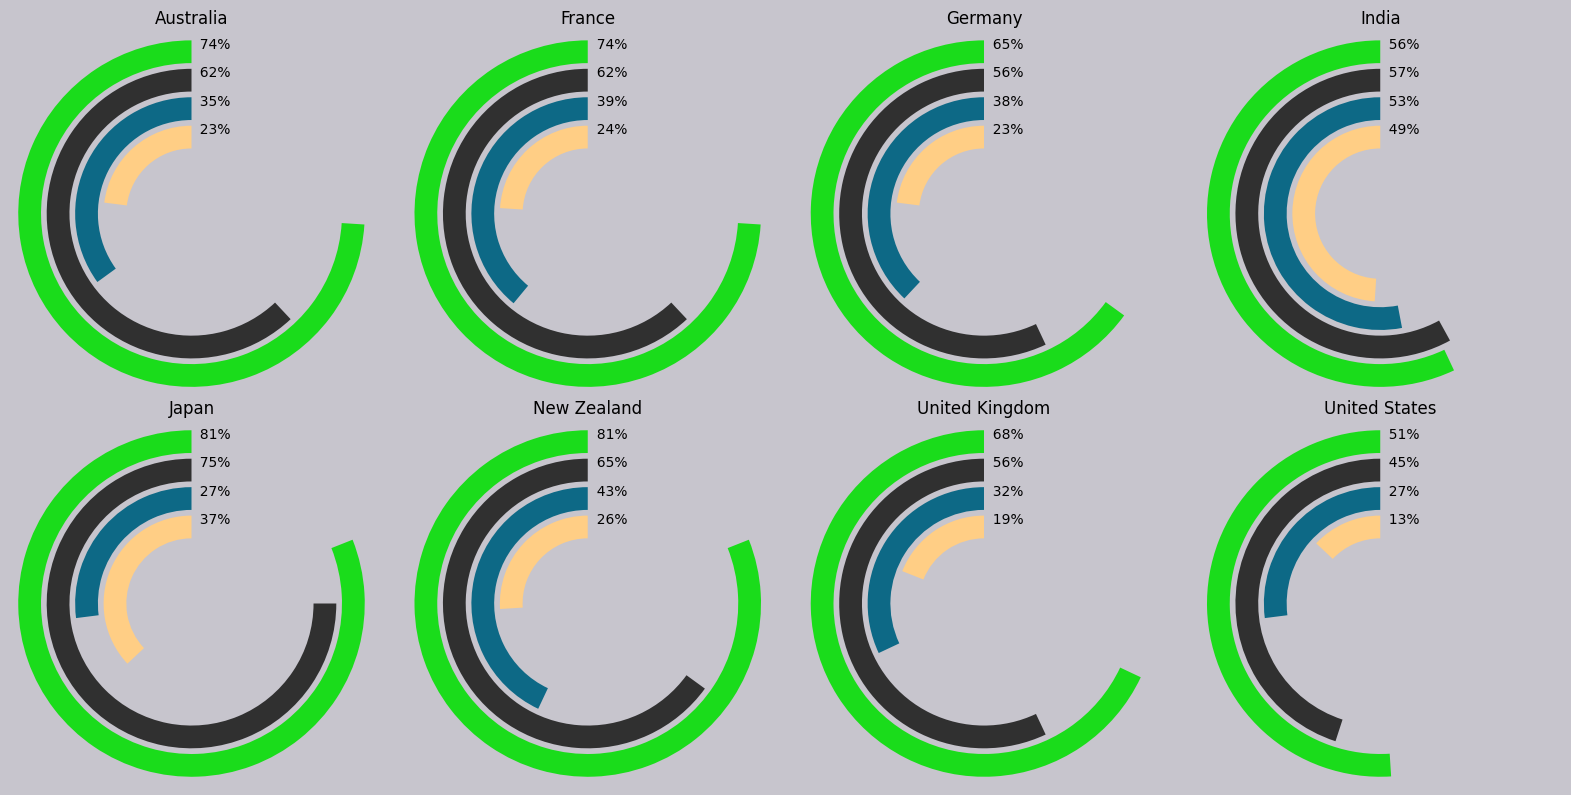

In [25]:
fig5, axes = plt.subplots(2, 4, subplot_kw={'projection': 'polar'}, figsize=(16, 8))

# Flatten the 2x4 grid to iterate through each subplot
axes = axes.flatten()

for i, country in enumerate(viz5['Country']):
    ax = axes[i]
    
    ax.barh(0, math.radians(0))
    ax.barh(1, math.radians(0))

    question_data = [
        math.radians(viz5["I don't know how to check if my identity has ever been stolen"][i] * 360),
        math.radians(viz5["I would have no idea what to do if my identity was stolen"][i] * 360),
        math.radians(viz5["I've never considered that my identity could be stolen"][i] * 360),
        math.radians(viz5["I don't know what identity theft is"][i] * 360)
    ]
    
    # Bar plot for each data point (radius is fixed, angle varies)
    ax.barh(2, question_data[3], color='#ffce85')
    ax.barh(3, question_data[2], color='#0D6986')
    ax.barh(4, question_data[1], color='#303030')
    ax.barh(5, question_data[0], color='#1adc1b')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction('counterclockwise')
    ax.set_rlabel_position(0)
    
    ax.grid(False)
    ax.spines['polar'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])

    new_labels = ['', '', 
                  '  ' + str(int(viz5["I don't know what identity theft is"][i]*100)) + '%',
                  '  ' + str(int(viz5["I've never considered that my identity could be stolen"][i]*100)) + '%',
                  '  ' + str(int(viz5["I would have no idea what to do if my identity was stolen"][i]*100)) + '%',
                  '  ' + str(int(viz5["I don't know how to check if my identity has ever been stolen"][i]*100)) + '%'
                  ]
    
    ax.set_yticks(range(len(new_labels)))
    ax.set_yticklabels(new_labels)
    ax.set_facecolor('#c7c5cd') 
    ax.set_title(viz5["Country"][i])

fig5.set_facecolor('#c7c5cd')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
I found it too complicated to change the text font of Matplotlib to Open Sans (the standard Plotly font that I used throughout the project), so I decided to add the text later in Canva and just include the chart without text.

I couldn’t save the plot as an SVG file either, so I manually saved it as a PNG file, which wasn’t a big issue in terms of scaling since there’s no text on the bars anyway.
</div>

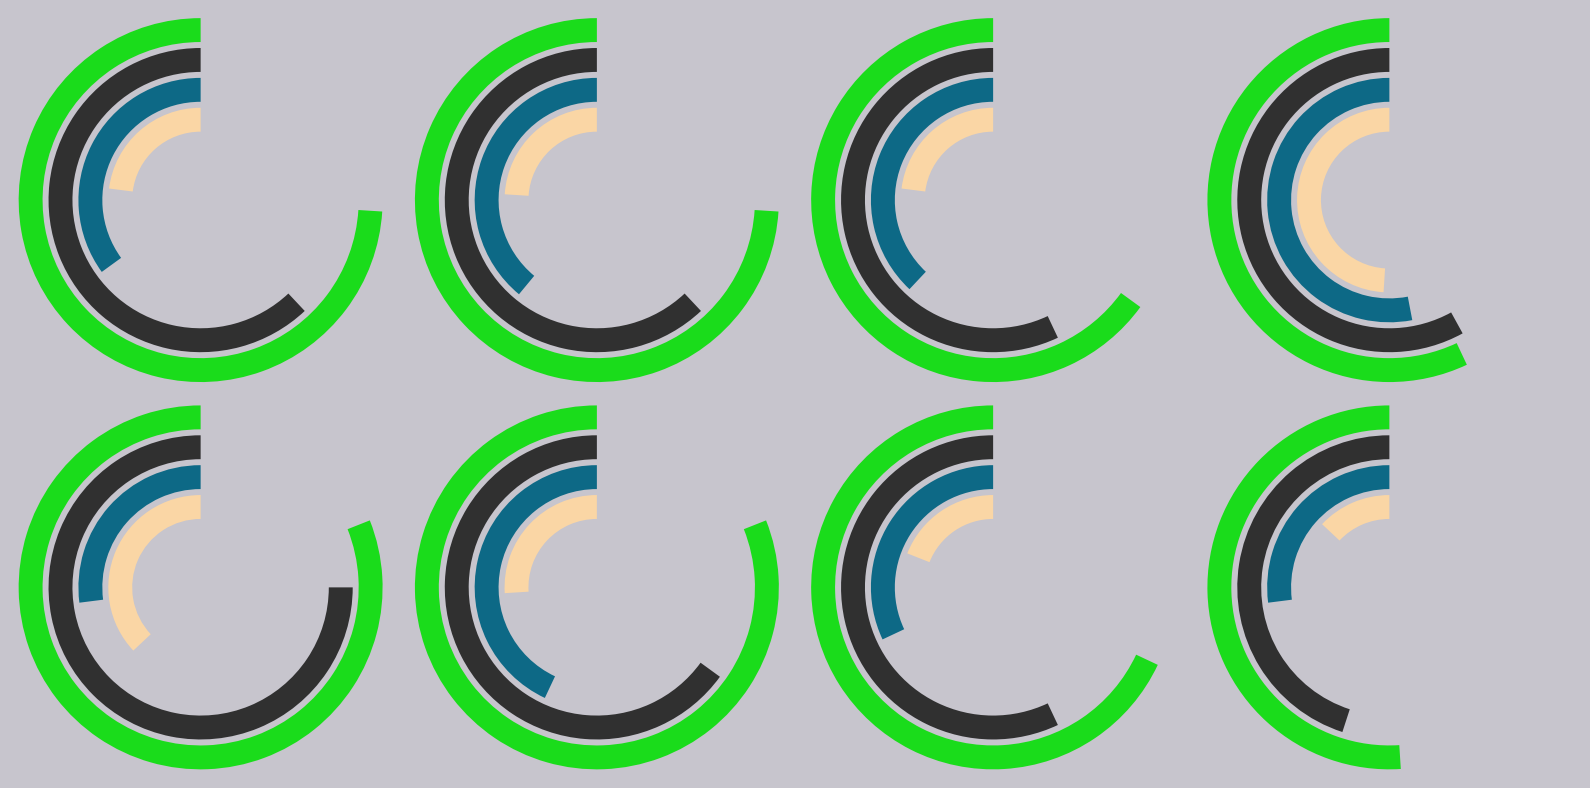

In [26]:
fig5, axes = plt.subplots(2, 4, subplot_kw={'projection': 'polar'}, figsize=(16, 8))

# Flatten the 2x4 grid to iterate through each subplot
axes = axes.flatten()

for i, country in enumerate(viz5['Country']):
    ax = axes[i]
    
    ax.barh(0, math.radians(0))
    ax.barh(1, math.radians(0))

    question_data = [
        math.radians(viz5["I don't know how to check if my identity has ever been stolen"][i] * 360),
        math.radians(viz5["I would have no idea what to do if my identity was stolen"][i] * 360),
        math.radians(viz5["I've never considered that my identity could be stolen"][i] * 360),
        math.radians(viz5["I don't know what identity theft is"][i] * 360)
    ]
    
    # Bar plot for each data point (radius is fixed, angle varies)
    ax.barh(2, question_data[3], color='#fad6a5')
    ax.barh(3, question_data[2], color='#0D6986')
    ax.barh(4, question_data[1], color='#303030')
    ax.barh(5, question_data[0], color='#1adc1b')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction('counterclockwise')
    ax.set_rlabel_position(0)
    
    ax.grid(False)
    ax.spines['polar'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([]) 
    ax.set_yticklabels([])
    ax.set_facecolor('#c7c5cd') 

fig5.set_facecolor('#c7c5cd')
fig5.set_facecolor('#c7c5cd')

plt.tight_layout()
plt.show()


## 2.6. Viz 6

### About the data set
<div class="alert alert-block alert-info">
Data source: 

https://informationisbeautiful.net/visualizations/top-500-passwords-visualized/
</div>

In [27]:
df6 = pd.read_csv('viz6/KIB - Passwords (public) - 2020 master password list.csv')
viz6 = df6[['Password', 'size', 'category']]
viz6

,Password,size,category
0,123456,20,alphanumeric
1,password,20,security
2,12345678,18,alphanumeric
3,1234,18,alphanumeric
4,qwerty,18,alphanumeric
...,...,...,...
495,einstein,8,nerdy
496,white,8,fluffy
497,stars,8,fluffy
498,broncos,8,sports


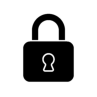

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Convert mask to a binary format (use the alpha channel to detect transparent regions if necessary)
# Keep non-transparent areas as the mask
processed_mask = np.array(Image.open('viz6/lock.png').convert("RGB"))

# Create a mask where white areas (255) are included
binary_mask = np.where(processed_mask > 200, 255, 0)

# Preview the processed mask to ensure it's ready for use
plt.figure(figsize=(1, 1))
plt.imshow(binary_mask, cmap='gray')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-info">
The size of each word reflects its rank; larger words indicate a higher rank in the dataset.
</div>

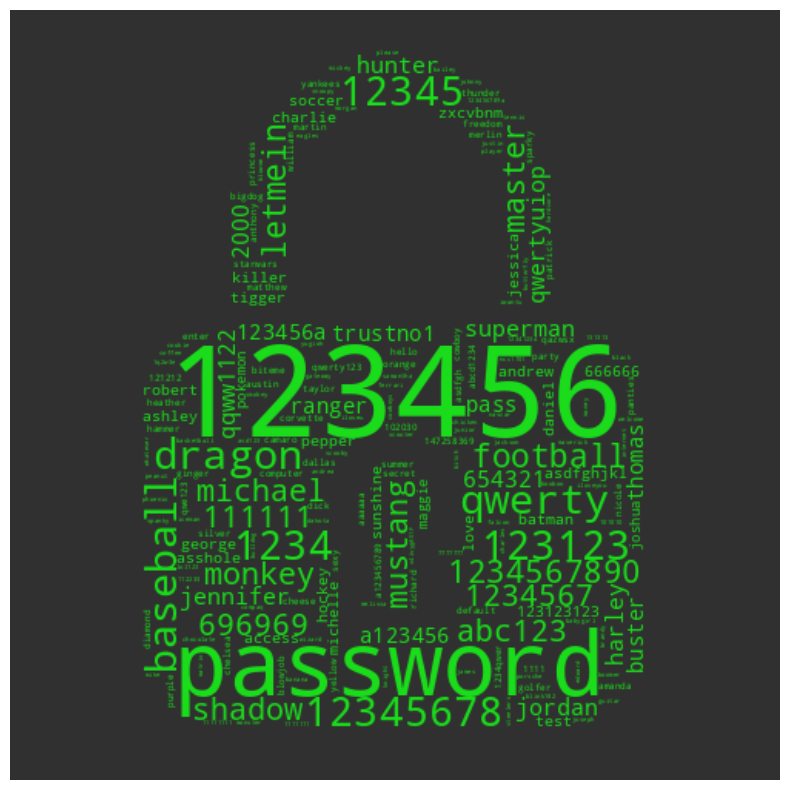

In [29]:
# Ensure the mask image is converted to RGB format (3 channels)
binary_mask_rgb = np.array(Image.open('viz6/lock.png').convert("RGB"))

# Prepare data: group words by category and assign colors
categories = viz6['category'].unique()
category_colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))  # Generate distinct colors for each category
category_color_map = {category: color for category, color in zip(categories, category_colors)}

# Combine words, sizes, and categories
word_sizes = defaultdict(int)
word_colors = {}

for _, row in viz6.iterrows():
    word_sizes[row['Password']] += row['size']
    word_colors[row['Password']] = category_color_map[row['category']]

# Define your single color as an RGB tuple (e.g., blue)
single_color = '#1adc1b'

# Custom color function to return the single color
def single_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return single_color

# Regenerate the word cloud using the corrected mask
wordcloud = WordCloud(
    width=2000,
    height=2000,
    min_font_size=1,
    max_font_size=419,
    random_state=1, # Ensure the same layout is generated each time
    background_color="#303030",
    mode="RGB",
    mask=binary_mask_rgb,
    color_func=single_color_func,
    contour_width=0,
    contour_color="black"
).generate_from_frequencies(word_sizes)

# Display the corrected word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_svg = wordcloud.to_svg(embed_font=True)
with open("viz6/viz6_capstone_NMN.svg", "w+") as svg:
   svg.write(wordcloud_svg)


<div class="alert alert-block alert-info">
I exported the word cloud as an SVG file and included it in my Canva edits, but when I exported the entire handout as a PDF, the word cloud didn’t display correctly, with overlapping words. I couldn’t discover a better way than transforming the SVG into a PNG and inserting it back into Canva. The resolution still seems good enough.

The issue:

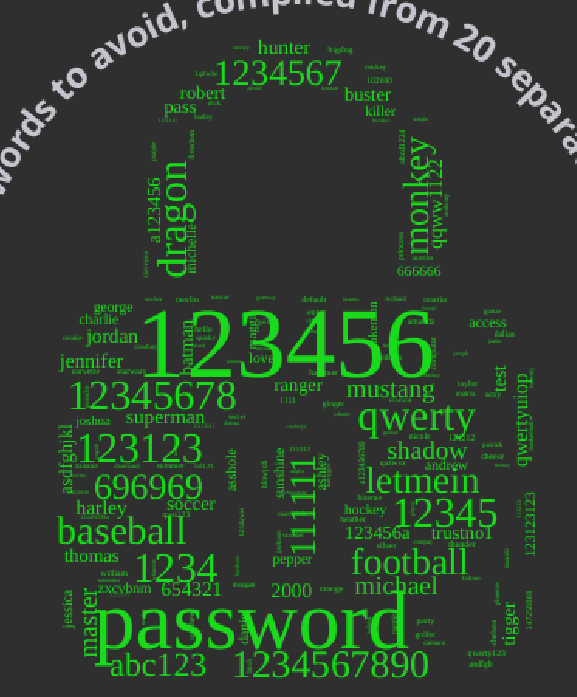
</div>

